Generate Henon map TS, with any IC.
<br>
Here, given parameters $a$ and $b$, I want to abandon a trajectory that is going off to inf, and start generating the TS again. I have written a recursive function for this.

In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Using defn of Henon map given in the Wolf paper.
def MyHenonFn(x, y, a, b):
    xnew = 1 - a*x*x + y
    ynew = b*x
    return xnew, ynew

In [4]:
# Recursive function that generates Henon map TS from random initial condition.
def MyTSGen(TS_Len, a, b):
    n = 0
    xTS = [np.random.uniform(-2, 2)]
    yTS = [np.random.uniform(-2, 2)]
    xn, yn = xTS[-1], yTS[-1]
    
    while n<TS_Len-1:
        n = n+1
        xn, yn = MyHenonFn(xTS[n-1], yTS[n-1], a, b)
        xTS.append(xn)
        yTS.append(yn)
        
        if abs(xn)>2.5:
            print ("Let's restart!")
            xTS, yTS = MyTSGen(TS_Len, a, b)
            break
    
    return(xTS, yTS)

In [5]:
a = 1.4
b = 0.3

In [6]:
dis = 5000
N = 2000

In [7]:
xTS, yTS = MyTSGen(dis+N, a, b)
print (len(xTS), len(yTS))

Let's restart!
7000 7000


^Here, "Let's restart!" is printed whenever the trajectory is going off to inf and the TS generation process is started all over again.

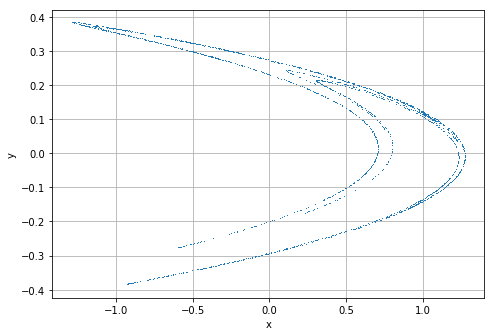

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#---
ax.plot(xTS[dis:], yTS[dis:], ",")
#---
ax.set_xlabel("x")
ax.set_ylabel("y")
#---
ax.grid()
plt.show()